## Import

In [1]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import statistics
from statistics import mean
from matplotlib import pyplot
from itertools import combinations
import copy

# Functions

## Create dictionary of weights

In [2]:
def weights_dict_and_list(G):
  """
  E_weights,E_weights_list = weights_dict_and_list(G)
  """
  E_weights = dict()
  for edge in G.edges():
    this = G.get_edge_data(edge[0],edge[1])
    E_weights[edge]= (this['weight'])

  E_weights_list = list(E_weights.values())
  return E_weights,E_weights_list

## draw Graph with some standard settings i like..

In [3]:
def draw(G,E_weighs=[]):#,E_weights_list):
  """
  draw(G,E_weights)#,E_weights_list)
  """
  

  E_weights,E_weights_list = weights_dict_and_list(G)
  pos = nx.spring_layout(G) #positioning of the graph
  plt.title("sum of weights : %s"%(sum(E_weights_list)))
  nx.draw(G,pos, with_labels=True, width=list(E_weights.values()))
  nx.draw_networkx_edge_labels(G,pos = pos, edge_labels=E_weights, label_pos=0.2, font_size=15,font_color='black',alpha = 0.9)

## draw multiple graphs sideby side

In [4]:
def draw_many(list_G, title = ""):
  l = len(list_G)# num of graphs
  if l <=3: 
    row_grid = 1
    col_grid = l

  else:
    row_grid = l
    col_grid = 1

  #draw 
  plt.figure(figsize=(6, 5))
  plt.suptitle('%s'%title)

  for i in range(0,l):
    G = list_G[i]
    plt.subplot(row_grid, col_grid, i+1)
    draw(G)



## dictionaries of edges and their mirror
depends greately on the ORDER of the edges

In [5]:
def dictionary_edges_mirror(edges):
  """
  (e_m) = dictionary_edges_mirror(edges)
  e_m: key = edge, value = mirror_edge
  """
  (e_m)= dict()
  m = len(edges)

  for i in range(m):
    this_e = (edges[i]) # i --> m+1-i
    mirror_e = (edges[m-1-i])
    #print ("%s <--> %s" %(this_e,mirror_e))

    if not (this_e[0],this_e[1],this_e[2]['weight']) in e_m.keys():
      e_m[(this_e[0],this_e[1],this_e[2]['weight']) ] = (mirror_e[0],mirror_e[1],mirror_e[2]['weight'])

  return (e_m)

## get mirror of tree, input tree edges, dictionary

In [6]:
def mirror_tree2(selected_edges,e_m):
  """
  selected_edges is a G.edges.data())
  
  mirror_edges= mirror_tree(selected_edges,e_m)
  """
  #create the mirror
  mirror_edges = []
  for edge in selected_edges:

    u,v,w = edge[0],edge[1],edge[2]['weight']
    if (u,v,w) in e_m.keys():
      mirror_edge = e_m[(u,v,w)]
    else:
      mirror_edge = e_m[(v,u,w)]

    mirror_edge = e_m[(edge[0],edge[1],edge[2]['weight'])]
    mirror_edge_noweights =  mirror_edge[:2]
    mirror_edges.append(mirror_edge_noweights)

  return mirror_edges

## get mirror of a tree, input list of edges
dictionary of mirrors (u,v,w) : (u_m,v_m,w_m)


In [7]:
def mirror_tree(selected_edges,e_m):
  """
  selected_edges is a list [(u,v)]
  mirror_edges= mirror_tree(selected_edges,e_m)
  """
  tree = G.edge_subgraph(selected_edges)
  #create the mirror
  mirror_edges = []
  for edge in tree.edges.data():
    #print (edge)
    mirror_edge = e_m[(edge[0],edge[1],edge[2]['weight'])]
    mirror_edge_noweights =  mirror_edge[:2]
    mirror_edges.append(mirror_edge_noweights)

  return mirror_edges



## all spanning trees and mirrors

In [8]:
def all_spanningtrees_mirrors(G,e_m, print_statement = False):
  """
  all_spanning_trees,all_mirror_trees= all_spanningtrees_mirrors(G)
  """
  all_spanning_trees = []
  all_mirror_trees = []
  num_v = len(G.nodes())

  combos = list(combinations(G.edges.data(),num_v-1))
  counter = 0
  if print_statement == True:
    print ("there are in total %s possible combination that could give spanning trees" %len(combos))
    print ("calculating spanning trees of lenght %s for G with %s nodes"%(num_v-1,num_v))

  for selected_edges in (combos):
    #print(selected_edges)
    selected_edges_noweights = [x[:2] for x in selected_edges]
    all_edges_flat = [element for tupl in selected_edges_noweights for element in tupl]
    selected_nodes = set(all_edges_flat)
    #print (selected_nodes)
    sG = G.edge_subgraph(selected_edges_noweights)

    # if the combination gives a spanning tree
    if len(selected_nodes) == len(G.nodes()) and nx.is_connected(sG):
      try: # search for cycles
        nx.find_cycle(sG)
      except:#if none continue
        counter +=1
        #create the mirror
        #mirror_edges= mirror_tree(selected_edges,e_m)
        mirror_edges = []
        for edge in selected_edges:
          mirror_edge = e_m[(edge[0],edge[1],edge[2]['weight'])]
          mirror_edge_noweights =  mirror_edge[:2]
          mirror_edges.append(mirror_edge_noweights)

        # add the tree and his mirror to a list
        if print_statement == True:
          print ("")
          print ("edges: ",selected_edges_noweights)
          print ("mirror_edges: ",mirror_edges)

        sG = G.edge_subgraph(selected_edges_noweights)
        sG_mirror = G.edge_subgraph(mirror_edges)
        all_spanning_trees.append(sG)
        all_mirror_trees.append(sG_mirror)
      else: 
        continue
  
  if print_statement == True:
    print ("%s spanning trees found" %(len(all_spanning_trees)))
  return all_spanning_trees,all_mirror_trees

### Computes adjacency matrix and labels (to be done ONCE) 

In [9]:
def adjacency_input(G):
  """
  axes_labels,axes_ticks,adjacency_matrix = adjacency_input(G)
  """
  axes_labels = list(G.nodes())
  axes_ticks = np.arange(len(axes_labels))
  adjacency_matrix = nx.to_numpy_matrix(G,nodelist=list(G.nodes()))
  return axes_labels,axes_ticks,adjacency_matrix

### Plot adjacency matrix of G with marked the edges of the given subgraph (to be done for each subgraph)

In [10]:
def plot_sG_over_adjacency_G(G,sG, axes_labels,axes_ticks,adjacency_matrix,E_weights_list,sG_weights_list):
  """
  needs first:  axes_labels,axes_ticks,adjacency_matrix = adjacency_input(G)
  """
  fig, ax = plt.subplots()
  im = ax.imshow(adjacency_matrix, cmap="Greys" )

  # Create colorbar https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.colorbar.html 
  #cbar = ax.figure.colorbar(im, ax=ax, ticks = list(set(E_weights_list)), spacing  = 'uniform', drawedges= False)

  # set ticks 
  ax.set_xticks(axes_ticks)
  ax.set_yticks(axes_ticks)
  # set tick labels
  ax.set_xticklabels(axes_labels)
  ax.set_yticklabels(axes_labels)
  # Set ticks on both sides of axes on
  ax.tick_params(axis="x", bottom=False, top=True, labelbottom=False, labeltop=True)

  # Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), 
          rotation=0, 
          ha="right",
          rotation_mode="anchor")


  # Loop over data dimensions and create text annotations.
  for i in range(len(axes_labels)):
      for j in range(len(axes_labels)):
        this_edge = adjacency_matrix[i, j]
        #print ("%s,%s : weight %s"%(i+1,j+1 ,this_edge))
        condition = sG.has_edge(i+1,j+1)
        #print (condition)
        #print (sG.edges())
        if condition and this_edge >0:
          weight_color = 'r'
        else: 
          weight_color = 'w'
        text = ax.text(j, i, this_edge,ha="center", va="center", color=weight_color)


  ax.set_title("G adjacency_matrix, m = %s, sG_weights_sum = %s" %(len(sG.edges()),sum(sG_weights_list) ))

  fig.tight_layout()
  plt.show()
  plt.savefig('adj_matrix.png')
  return fig

### Plot trees, mirrors, and adjacency matrix with markers


In [11]:
def plot_trees_mirrors_adjmatrix_marked(all_spanning_trees, all_mirror_trees,G_E_weights_list, marked_statement = True):
  """
  plots spanning trees with their mirror and correspondent adjacency matrices
  doesnt return anything
  if marked statement is False the adjiacency matrix will be ONLY of the graph(or subgraph given), not the matrix of the Graph with subgraph edges marked
  """

  for i in range(len(all_spanning_trees)):
    subgraph = all_spanning_trees[i]
    subgraph_mirror = all_mirror_trees[i] 


    subgraph_E_weights,subgraph_E_weights_list = weights_dict_and_list(subgraph)
    subgraph_mirror_E_weights,subgraph_mirror_E_weights_list = weights_dict_and_list(subgraph_mirror)

    axes_labels,axes_ticks,adjacency_matrix = adjacency_input(G)



    # plot graphs
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.title ("G spanning tree, m = %s, sum = %s" %(len(subgraph.edges()),sum(subgraph_E_weights_list) ))
    pos = nx.spring_layout(subgraph) #positioning of the graph
    nx.draw(subgraph,pos, with_labels=True, width=list(subgraph_E_weights.values()))
    nx.draw_networkx_edge_labels(subgraph,pos = pos, edge_labels=subgraph_E_weights, label_pos=0.5, font_size=15,font_color='black')

    plt.subplot(2, 2, 2)
    plt.title ("mirror of G spanning tree, m = %s, sum = %s" %(len(subgraph_mirror.edges()),sum(subgraph_mirror_E_weights_list) ))
    pos = nx.spring_layout(subgraph_mirror) #positioning of the graph
    nx.draw(subgraph_mirror,pos, with_labels=True, width=subgraph_mirror_E_weights_list)
    nx.draw_networkx_edge_labels(subgraph_mirror,pos = pos, edge_labels=subgraph_mirror_E_weights, label_pos=0.5, font_size=15,font_color='black')

      
    #plt.subplot(2, 2, 3)
    if marked_statement ==  True:
      plot_sG_over_adjacency_G(G,subgraph, axes_labels,axes_ticks,adjacency_matrix,G_E_weights_list,subgraph_E_weights_list)
    else:
      plot_adjacency_G(subgraph)

    #plt.subplot(2, 2, 4)
    if marked_statement ==  True:
      plot_sG_over_adjacency_G(G,subgraph_mirror, axes_labels,axes_ticks,adjacency_matrix,G_E_weights_list,subgraph_mirror_E_weights_list)
    else:
      plot_adjacency_G(subgraph_mirror)

## Plot one tree and its mirror

In [12]:
def plot_subgraph_mirror(subgraph,subgraph_mirror):
    subgraph_E_weights,subgraph_E_weights_list = weights_dict_and_list(subgraph)
    subgraph_mirror_E_weights,subgraph_mirror_E_weights_list = weights_dict_and_list(subgraph_mirror)

    # plot graphs
    plt.figure(figsize=(12, 10))
    plt.subplot(2, 2, 1)
    plt.title ("G spanning tree, m = %s, sum = %s" %(len(subgraph.edges()),sum(subgraph_E_weights_list) ))
    pos = nx.spring_layout(subgraph) #positioning of the graph
    nx.draw(subgraph,pos, with_labels=True, width=list(subgraph_E_weights.values()))
    nx.draw_networkx_edge_labels(subgraph,pos = pos, edge_labels=subgraph_E_weights, label_pos=0.5, font_size=15,font_color='black')

    plt.subplot(2, 2, 2)
    plt.title ("mirror of G spanning tree, m = %s, sum = %s" %(len(subgraph_mirror.edges()),sum(subgraph_mirror_E_weights_list) ))
    pos = nx.spring_layout(subgraph_mirror) #positioning of the graph
    nx.draw(subgraph_mirror,pos, with_labels=True, width=subgraph_mirror_E_weights_list)
    nx.draw_networkx_edge_labels(subgraph_mirror,pos = pos, edge_labels=subgraph_mirror_E_weights, label_pos=0.5, font_size=15,font_color='black')

## Plot trees, mirrors


In [13]:
def plot_trees_mirrors(all_spanning_trees, all_mirror_trees,G_E_weights_list):
  """
  plots spanning trees with their mirror and correspondent adjacency matrices
  doesnt return anything
  if marked statement is False the adjiacency matrix will be ONLY of the graph(or subgraph given), not the matrix of the Graph with subgraph edges marked
  """

  for i in range(len(all_spanning_trees)):
    subgraph = all_spanning_trees[i]
    subgraph_mirror = all_mirror_trees[i] 

    plot_subgraph_mirror(subgraph,subgraph_mirror)

## get coordinates u,v

In [14]:
def get_list_coordinates(edges):
  """
  edges = G.edges.data()
  """
  return [(x[0],x[1])for x in list(edges)]

## get weights

In [15]:
def get_list_weights(edges):
  """
  edges = G.edges.data()
  """
  return [x[2]['weight'] for x in list(edges)]

## flatten edges

In [16]:
def flatten_edges_with_weights(edges):
  """
  edges = G.edges.data()
  """
  return [(x[0],x[1],x[2]['weight'] )for x in list(edges)]

## check if Graph is complete

In [17]:
def is_complete(G):
    n = G.order()
    return n*(n-1)/2 == G.size()

## find MST Kruskal

In [18]:
#my  own implementation of Kruskal's algorithm. 
def find_MST(G= nx.Graph(),edges = [],print_stat = True):
  """
  give edges of the graph (flat!) or graph
  """
  if len(edges) >0:
    if isinstance(edges, list):
      new_edges = edges
    elif isinstance(edges, nx.classes.reportviews.EdgeDataView):
      new_edges = flatten_edges_with_weights(edges)
    else:
      print ("edges should be list or nx.classes.reportviews.EdgeDataView, not %s" %(type(edges)))
  elif (not len(edges) >0) and (not nx.is_empty(G)):
    edges = G.edges.data()
    new_edges = flatten_edges_with_weights(edges)
  else:
    new_edges = []
    
  new_edges.sort(key = lambda x: x[2])
  if len(new_edges) >0:
    MST = nx.Graph()

    # take the smallest edge, add to the edges of the Tree
    # edges are sorted in increasing order!!!!!
    start = new_edges[:1]
    MST.add_weighted_edges_from(start)
    if print_stat == True:
      print ("start: %s" %(new_edges[:1]))

    # for each edge in the graph after the first
    for i in range(1,len(new_edges)): # O(n-1)
      #print ("")
      # take nodes 0f the next smallest edge
      proposed_edge = new_edges[i:i+1]
      #print ("proposed_edge: %s" %(proposed_edge))
      MST.add_weighted_edges_from(proposed_edge)

      # if this edge doesnt cause a cycle 
      try:
        nx.find_cycle(MST)
      except:
        if print_stat == True:
          print ("proposed_edge: %s - added" %(proposed_edge))
        else: continue
      else: 
        if print_stat == True:
          print ("proposed_edge :%s - cycle created, discarded" %proposed_edge)
        u,v,w = proposed_edge[0][0],proposed_edge[0][1],proposed_edge[0][2]
        MST.remove_edge(u,v)

    if print_stat == True:
      print ("end, minimum spanning tree found over edges :")
      print (MST.edges())
    
    return MST
  else:
    if print_stat == True:
      print ("give graph or edges to calculate MST")
      print ("")

## MST and mirror

In [19]:
def min_trees_mirrors(all_spanning_trees, all_mirror_trees,G_E_weights_list, print_statement = False):
  """
  upper_boud, best = min_trees_mirrors(all_spanning_trees, all_mirror_trees,G_E_weights_list, marked_statement = True)
  plots spanning trees with their mirror

  returns
  upper bound found 
  subgraph, subgraph_mirror = best
  """
  upper_bound = sum(G_E_weights_list)
  #print ("B: ",upper_bound)
  best = []
  for i in range(len(all_spanning_trees)):
    subgraph = all_spanning_trees[i]
    subgraph_mirror = all_mirror_trees[i] 


    subgraph_E_weights,subgraph_E_weights_list = weights_dict_and_list(subgraph)
    subgraph_mirror_E_weights,subgraph_mirror_E_weights_list = weights_dict_and_list(subgraph_mirror)

    first = sum(subgraph_E_weights_list)
    second = sum(subgraph_mirror_E_weights_list)
    highest = max(first,second)

    if print_statement == True:
      print("")
      print ("G spanning tree, m = %s, sum = %s" %(len(subgraph.edges()),sum(subgraph_E_weights_list) ))
      print (subgraph.edges.data())
      print ("mirror of G spanning tree, m = %s, sum = %s" %(len(subgraph_mirror.edges()),sum(subgraph_mirror_E_weights_list) ))
      print (subgraph_mirror.edges.data())
    if highest <= upper_bound:
      upper_bound = highest
      #print ("%s) B: %s"%(i,upper_bound))
      best = (subgraph,subgraph_mirror)
  
  if not len(best) >0:
    empty_graph = nx.Graph()
    best = (empty_graph,empty_graph)


  return upper_bound,best

In [20]:
#adjacency_matrix = nx.to_numpy_matrix(G,nodelist=list(G.nodes()))
#adjacency_matrix

In [21]:
#transpose_matrix = adjacency_matrix.transpose()
#transpose_matrix

In [22]:
#adjacency_matrix*transpose_matrix

## Full algorithm

In [23]:
def test_my_algorithm(G, counter,margin = 0, draw_stat = False):
  """
  counter, mysolution, myG, mirror_myG, exact_solution,subgraph,subgraph_mirror = test_my_algorithm(G, counter, draw_stat = False)
  takes a complete weighted Graph as an input
  calculates the exact solution
  calculates the approximate solution

  #todo return time for calculation of both
  """
  
  E_weights,E_weights_list = weights_dict_and_list(G)
  #draw
  if draw_stat == True:
    plt.tight_layout(pad=5.0)
    plt.figure(figsize=(6, 5))
    draw(G)

  # my algorithm
  edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))#sort edges in increasing order 
  edges_reverse=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse = True)# create the mirrored edges  
  e_m = dictionary_edges_mirror(edges)# create dictionary of edges and their mirrors 
  #print (e_m)
  
  # sum edges with their mirror
  new_edges_dict= copy.deepcopy(edges)
  new_edges = []
  for i in range(len(edges)):
    new_weight = (edges[i][2]['weight']+edges_reverse[i][2]['weight'])
    new_edges_dict[i][2]['weight'] = new_weight
    new_edges.append((edges[i][0],edges[i][1],new_weight))
  
  new_edges.sort(key = lambda x: x[2])# sort new_edges in O(n log n) both on average and in the worst case.

  # create graph with the new edges
  bigG= nx.Graph()
  bigG.add_weighted_edges_from(new_edges)
  
  # find MST
  MST = find_MST(bigG,print_stat=draw_stat)
  #MST_mirror = mirror_tree2((MST.edges.data()),e_m)
  
  #draw
  #if draw_stat == True:
   # draw(bigG)

  # approximate solution
  myG = G.edge_subgraph(MST.edges())
  mysolution = myG.edges()

  #its mirror
  key_uv = get_list_coordinates(myG.edges.data())
  MST_mirror_edges = mirror_tree(key_uv,e_m)
  MST_mirror= G.edge_subgraph(MST_mirror_edges)

  #create mirror of my solution
  mirror_edges = mirror_tree(mysolution,e_m)
  mirror_myG = G.edge_subgraph(mirror_edges)


  # exact solution
  all_spanning_trees,all_mirror_trees= all_spanningtrees_mirrors(G,e_m) #O(n^(n-2))
  upper_bound, best = min_trees_mirrors(all_spanning_trees, all_mirror_trees,E_weights_list) #O(n-1)*2 +O(1)+O(1)
  subgraph, subgraph_mirror = best
  exact_solution = subgraph.edges()

  my_best = max(sum(get_list_weights(mysolution.data())),sum(get_list_weights((MST_mirror.edges.data()))  ))
  exact_best = sum(get_list_weights(exact_solution.data()))

  margin = 0.2

  if  my_best in (range(0,exact_best+round(exact_best*margin))) :
  #if  my_best == exact_best :
    if draw_stat == True:
      print ("my solution %s, exact solution %s"%(my_best,exact_best))
    counter +=1
  else:
    if draw_stat == True:
      print ("DIFFERENCE: %s . my solution %s, exact solution %s"%(my_best-exact_best,my_best,exact_best))

  #draw
  if draw_stat == True:
    draw_many([subgraph,subgraph_mirror], "exact solution")
    draw_many([myG,mirror_myG], "my solution")

  return counter, mysolution, myG, mirror_myG, exact_solution,subgraph,subgraph_mirror

  

## all possible edges/matrices transformations

didnt get to a perfect transformation that gives me the solution

## create new edges which are sum edges with their mirror
new_edge_i = e_i + e_m+1-i

In [24]:
# sum edges with their mirror
def sum_with_mirror_edges(edges):
  """
  new_edges,new_edges_dict = sum_with_mirror_edges(edges)
  """
  new_edges_dict= copy.deepcopy(edges)
  new_edges = []
  for i in range(len(edges)):
    new_weight = (edges[i][2]['weight']+edges_reverse[i][2]['weight'])

    new_edges_dict[i][2]['weight'] = new_weight
    new_edges.append((edges[i][0],edges[i][1],new_weight))
  return new_edges,new_edges_dict

### create new edges with MinSquareError
new_edge_i = (e_i-e_m+1-i)**2


In [25]:
def least_square_error_edges(edges):
  """
  new_edges,new_edges_dict = least_square_error_edges(edges)
  """
  new_edges_dict= copy.deepcopy(edges)
  new_edges = []
  for i in range(len(edges)):
    new_weight = (edges[i][2]['weight']-edges_reverse[i][2]['weight'])**2
    print (new_weight)
    new_edges_dict[i][2]['weight'] = new_weight
    new_edges.append((edges[i][0],edges[i][1],new_weight))
  return new_edges,new_edges_dict

### create new edges and mirrored one, without sorting

In [26]:
def e_me_no_sorting(G):
  """
  ns_edges,e_m_not_sorted, new_edges, new_edges_dict= e_me_no_sorting(G)
  """
  ns_edges = list(G.edges(data=True))
  e_m_not_sorted = dictionary_edges_mirror(ns_edges)

  mirror_edges= mirror_tree(ns_edges,e_m_not_sorted)


  new_edges_dict= copy.deepcopy(ns_edges)
  new_edges = []
  for e in (ns_edges):
    u,v,w = e[0],e[1],e[2]['weight'] 
    m_u,m_v,m_w = e_m_not_sorted[(u,v,w)]
    new_weight = e[2]['weight'] + m_w
    new_edges.append((e[0],e[1],new_weight))

  return  ns_edges,e_m_not_sorted, new_edges,new_edges_dict

# Optimization Algorithm 

## create and visualize a random weighted fully connected graph

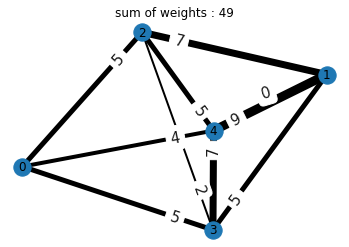

In [27]:
n = 5
G = nx.complete_graph(n) #generate a random complete graph
for u,v,w in G.edges(data=True): # add random weights 
     w['weight'] = np.random.randint(0,10)

draw(G)

In [28]:
E_weights,E_weights_list = weights_dict_and_list(G)
E_weights

{(0, 1): 0,
 (0, 2): 5,
 (0, 3): 5,
 (0, 4): 4,
 (1, 2): 7,
 (1, 3): 5,
 (1, 4): 9,
 (2, 3): 2,
 (2, 4): 5,
 (3, 4): 7}

In [29]:
is_complete(G)

True

#### alternative is to create Graph with specific nodes and edges

In [30]:
# create an empty ( to be fully connected) graph

#G = nx.Graph()
##V = [1,2,3,4]
#E = [(1,2,1),(2,3,3),(3,1,1)]
#E = [(1,2,2),(2,3,5),(1,3,1), (1,4,7),(4,3,2),(4,2,1) ] #(u,v,weight)

#add nodes from V or E
##G.add_nodes_from(V)
#G.add_weighted_edges_from(E)
#print (is_complete(G))
#draw(G)

In [31]:
list(G.edges(data=True))

[(0, 1, {'weight': 0}),
 (0, 2, {'weight': 5}),
 (0, 3, {'weight': 5}),
 (0, 4, {'weight': 4}),
 (1, 2, {'weight': 7}),
 (1, 3, {'weight': 5}),
 (1, 4, {'weight': 9}),
 (2, 3, {'weight': 2}),
 (2, 4, {'weight': 5}),
 (3, 4, {'weight': 7})]

### sort edges and create a mirror dictionary

In [32]:
#sort edges in increasing order 
edges=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1))

# create the mirrored edges
edges_reverse=sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse = True)

# create dictionary of edges and their mirrors 
e_m = dictionary_edges_mirror(edges)

In [33]:
e_m

{(0, 1, 0): (1, 4, 9),
 (0, 2, 5): (2, 4, 5),
 (0, 3, 5): (1, 3, 5),
 (0, 4, 4): (1, 2, 7),
 (1, 2, 7): (0, 4, 4),
 (1, 3, 5): (0, 3, 5),
 (1, 4, 9): (0, 1, 0),
 (2, 3, 2): (3, 4, 7),
 (2, 4, 5): (0, 2, 5),
 (3, 4, 7): (2, 3, 2)}

In [34]:
new_edges,new_edges_dict = sum_with_mirror_edges(edges)

In [35]:
new_edges_dict

[(0, 1, {'weight': 9}),
 (2, 3, {'weight': 9}),
 (0, 4, {'weight': 11}),
 (0, 2, {'weight': 10}),
 (0, 3, {'weight': 10}),
 (1, 3, {'weight': 10}),
 (2, 4, {'weight': 10}),
 (1, 2, {'weight': 11}),
 (3, 4, {'weight': 9}),
 (1, 4, {'weight': 9})]

In [36]:
new_edges

[(0, 1, 9),
 (2, 3, 9),
 (0, 4, 11),
 (0, 2, 10),
 (0, 3, 10),
 (1, 3, 10),
 (2, 4, 10),
 (1, 2, 11),
 (3, 4, 9),
 (1, 4, 9)]

In [37]:
# sort new_edges in O(n log n) both on average and in the worst case.
new_edges.sort(key = lambda x: x[2])
new_edges

[(0, 1, 9),
 (2, 3, 9),
 (3, 4, 9),
 (1, 4, 9),
 (0, 2, 10),
 (0, 3, 10),
 (1, 3, 10),
 (2, 4, 10),
 (0, 4, 11),
 (1, 2, 11)]

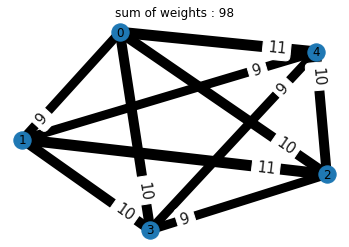

In [38]:
# look at the graph with the new edges
bigG= nx.Graph()
bigG.add_weighted_edges_from(new_edges)
draw(bigG)

In [39]:
MST = find_MST(bigG)

start: [(0, 1, 9)]
proposed_edge: [(1, 4, 9)] - added
proposed_edge: [(2, 3, 9)] - added
proposed_edge: [(3, 4, 9)] - added
proposed_edge :[(0, 2, 10)] - cycle created, discarded
proposed_edge :[(0, 3, 10)] - cycle created, discarded
proposed_edge :[(1, 3, 10)] - cycle created, discarded
proposed_edge :[(2, 4, 10)] - cycle created, discarded
proposed_edge :[(0, 4, 11)] - cycle created, discarded
proposed_edge :[(1, 2, 11)] - cycle created, discarded
end, minimum spanning tree found over edges :
[(0, 1), (1, 4), (4, 3), (2, 3)]


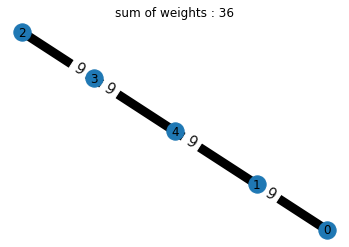

In [40]:
draw(MST)

## mysolution

In [41]:
mysolution = MST.edges()

the MST of the combined graph is also a solution for the inequality of the original graph?

## Exact solution

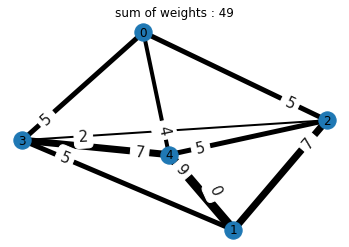

In [42]:
draw(G)

In [43]:
e_m

{(0, 1, 0): (1, 4, 9),
 (0, 2, 5): (2, 4, 5),
 (0, 3, 5): (1, 3, 5),
 (0, 4, 4): (1, 2, 7),
 (1, 2, 7): (0, 4, 4),
 (1, 3, 5): (0, 3, 5),
 (1, 4, 9): (0, 1, 0),
 (2, 3, 2): (3, 4, 7),
 (2, 4, 5): (0, 2, 5),
 (3, 4, 7): (2, 3, 2)}

In [44]:
all_spanning_trees,all_mirror_trees= all_spanningtrees_mirrors(G,e_m)

In [45]:
axes_labels,axes_ticks,adjacency_matrix = adjacency_input(G)

In [46]:
if len(all_spanning_trees) <=20: 
  plot_trees_mirrors(all_spanning_trees, all_mirror_trees,E_weights_list)

In [47]:
upper_bound, best = min_trees_mirrors(all_spanning_trees, all_mirror_trees,E_weights_list)

In [48]:
subgraph, subgraph_mirror = best

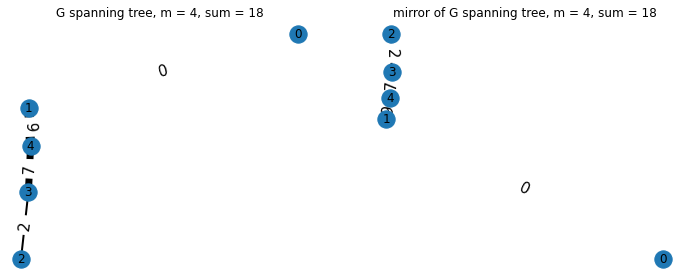

In [49]:
plot_subgraph_mirror(subgraph,subgraph_mirror)

## Comparison

In [50]:
exact_solution = subgraph.edges() # DO NOT TAKE THE DATA! the weight is not the same as in the original graph

In [51]:
print (mysolution)
print (exact_solution)

[(0, 1), (1, 4), (4, 3), (2, 3)]
[(0, 1), (1, 4), (2, 3), (3, 4)]


In [52]:
mysolution == exact_solution

True

In [53]:
myG = G.edge_subgraph(mysolution)

#create mirror of my solution
mirror_edges = mirror_tree(mysolution,e_m)
mirror_myG = G.edge_subgraph(mirror_edges)

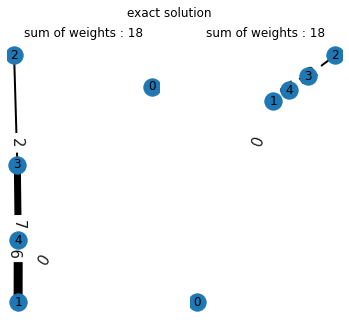

In [54]:
draw_many([subgraph,subgraph_mirror], "exact solution")

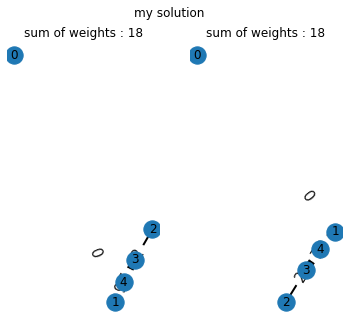

In [55]:
draw_many([myG,mirror_myG], "my solution")

# Test over many graphs
might take time! (more than 10e4 seems kinda...slow ofc)

In [72]:
value = input("Please enter how many graphs you want to simulate (it will take time): \n")
print(f'You entered {value}')

margins = [0.3,0.2,0.1,0.05,0.01,0.001]
#this_margin = 0.01
#counter = 0

for this_margin in margins:
  counter = 0
  for i in range(int(value)):
    n = 4
    G = nx.complete_graph(n) #generate a random complete graph
    for u,v,w in G.edges(data=True): # add random weights 
        w['weight'] = np.random.randint(0,100)
    counter, mysolution, myG, mirror_myG, exact_solution,subgraph,subgraph_mirror = test_my_algorithm(G, counter, margin = this_margin,draw_stat = False)

  print ("my solution produces results close to the (optimal+%s percent)  %s/%s times" %(this_margin*100,counter, int(value)))




Please enter how many graphs you want to simulate (it will take time): 
10000
You entered 10000
my solution produces results close to the (optimal+30.0 percent)  8017/10000 times
my solution produces results close to the (optimal+20.0 percent)  8082/10000 times
my solution produces results close to the (optimal+10.0 percent)  8051/10000 times
my solution produces results close to the (optimal+5.0 percent)  8009/10000 times
my solution produces results close to the (optimal+1.0 percent)  7978/10000 times
my solution produces results close to the (optimal+0.1 percent)  8083/10000 times


## TO DO: look in the damn 20% of wrongs and understand why.

idea: choosing the min path in the bigG gives a minimal that i am not ensure being the absolute. 

basically it chooses the lighter edge at step1, which might exclude from the tree one further optimal choice. how to kick the alg out of the local min? 

In [57]:
print ("result into %s percent of the optimal %s percent of the times" %(this_margin*100,counter*100/int(value)))

result into 20.0 percent of the optimal 80.7 percent of the times


In [63]:
print ("result into %s percent of the optimal %s percent of the times" %(this_margin*100,counter*100/int(value)))

result into 10.0 percent of the optimal 81.0 percent of the times


In [65]:
print ("result into %s percent of the optimal %s percent of the times" %(this_margin*100,counter*100/int(value)))

result into 5.0 percent of the optimal 81.8 percent of the times


In [67]:
print ("result into %s percent of the optimal %s percent of the times" %(this_margin*100,counter*100/int(value)))

result into 1.0 percent of the optimal 81.3 percent of the times


# Create new Graphs from the G and mirror_G?????


In [ ]:
# sum edges with their mirror
R = nx.Graph()
update_edges = []
for edge in edges_reverse:
  up_edge = ((10*edge[0],10*edge[1],edge[2]['weight']))
  update_edges.append(up_edge)
R.add_weighted_edges_from(update_edges)

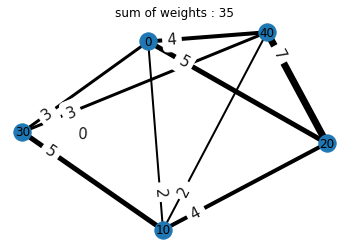

In [ ]:
draw(R)

In [ ]:
G.edges.data()

EdgeDataView([(0, 1, {'weight': 2}), (0, 2, {'weight': 5}), (0, 3, {'weight': 3}), (0, 4, {'weight': 4}), (1, 2, {'weight': 4}), (1, 3, {'weight': 5}), (1, 4, {'weight': 2}), (2, 3, {'weight': 0}), (2, 4, {'weight': 7}), (3, 4, {'weight': 3})])

In [ ]:
R.edges.data()

EdgeDataView([(20, 40, {'weight': 7}), (20, 0, {'weight': 5}), (20, 10, {'weight': 4}), (20, 30, {'weight': 0}), (40, 0, {'weight': 4}), (40, 30, {'weight': 3}), (40, 10, {'weight': 2}), (0, 30, {'weight': 3}), (0, 10, {'weight': 2}), (10, 30, {'weight': 5})])

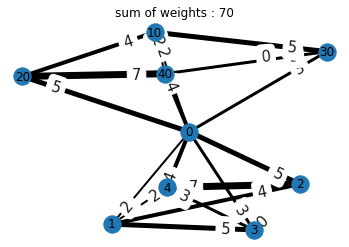

In [ ]:
F = nx.compose(G,R)
draw(F)

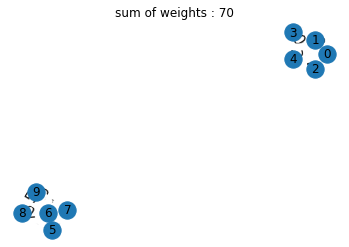

In [ ]:
U = nx.disjoint_union(G,R)
draw(U)

In [ ]:
new_edges = flatten_edges_with_weights(F.edges.data())
new_edges

[(0, 1, 2),
 (0, 2, 5),
 (0, 3, 3),
 (0, 4, 4),
 (0, 20, 5),
 (0, 40, 4),
 (0, 30, 3),
 (0, 10, 2),
 (1, 2, 4),
 (1, 3, 5),
 (1, 4, 2),
 (2, 3, 0),
 (2, 4, 7),
 (3, 4, 3),
 (20, 40, 7),
 (20, 10, 4),
 (20, 30, 0),
 (40, 30, 3),
 (40, 10, 2),
 (10, 30, 5)]